<a href="https://colab.research.google.com/github/nadia-data/nadia-data/blob/main/Test_technique_EL_HANINE_Nadia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### load and describe the data

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data_train=pd.read_csv('hour.csv') # reading our training data
data_train.head()# visualizing the first five rows of our data 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data_train.shape # checking Shape of the data

(17379, 17)

In [ ]:
 data_train.describe() # seeing statistics of our data 

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
data_train.isnull().sum() # checking missing values in our data

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data_train.info()  # checking missing values in our data and the columns type of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
data_train.insert(4,"day", pd.DatetimeIndex(data_train['dteday']).day, allow_duplicates=False) # add the day to our data from the date 

In [ ]:
data_train.drop(['dteday','instant'], axis = 1, inplace = True)# get rid of columns that are not necessary for our prediction
data_train.head() #visualize our data again to check if the day has been added and the columns has been removed

,season,yr,day,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#make graphic


In [ ]:
data_graphic=data_train.copy() #taking a copy of the data to build useful graphs
data_graphic.head()


,season,yr,day,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data_graphic['season'] = data_graphic.season.map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}) #add the name of each season 
data_graphic['weathersit'] =data_graphic.weathersit.map({1:'Clear', 2:'Mist', 3:'Light rain', 4:'Heavy rain'})#add the name for each weather 

In [ ]:
data_graphic.head() # 

,season,yr,day,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Winter,0,1,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,Winter,0,1,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,Winter,0,1,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,Winter,0,1,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,Winter,0,1,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


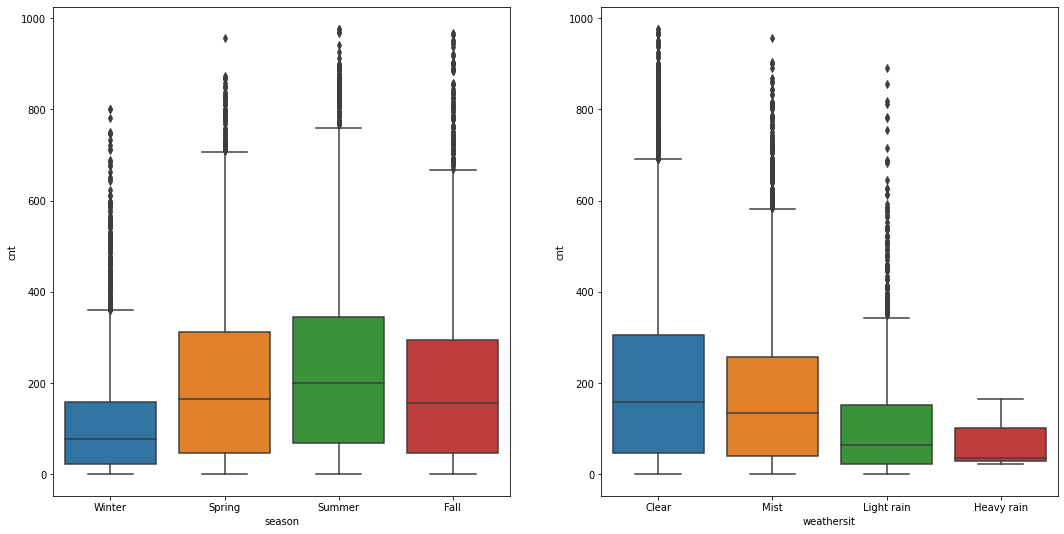

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,9))
sns.boxplot(x = 'season', y = 'cnt', data = data_graphic, ax = ax1,)#Plot the demand according to season.
sns.boxplot(x = 'weathersit', y = 'cnt', data = data_graphic, ax = ax2)#Plot the demand according to weather.

On remarque que la demande est élevée en été et en printemps ce qui est normale à cause du climat et de la disponibilité des consommateurs ,de même pour la demande en temps clair .

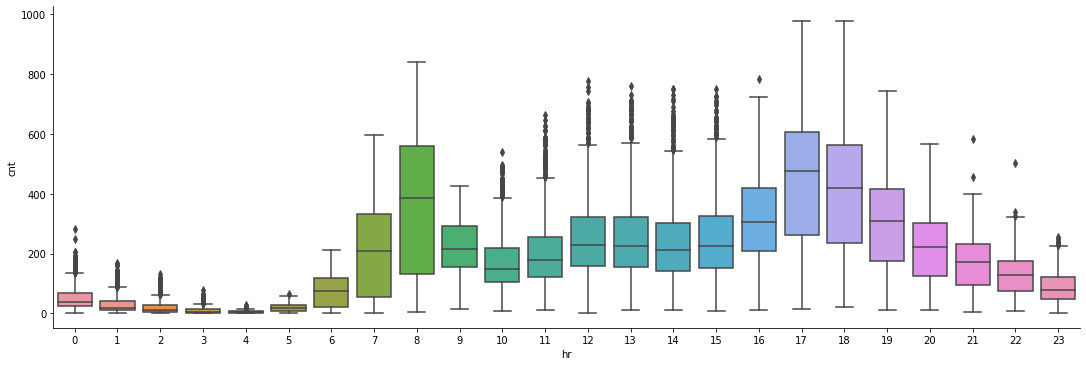

In [ ]:
sns.catplot(x = 'hr', y = 'cnt', data = data_graphic, kind = 'box', aspect = 3) #Plot the demand according to the hour of the day

La valeur médiane est relativement plus élevée à 7h-8h et à 17h-18h. Cela peut être attribué aux utilisateurs réguliers des écoles et des bureaux à ces heures.

<Figure size 864x432 with 0 Axes>

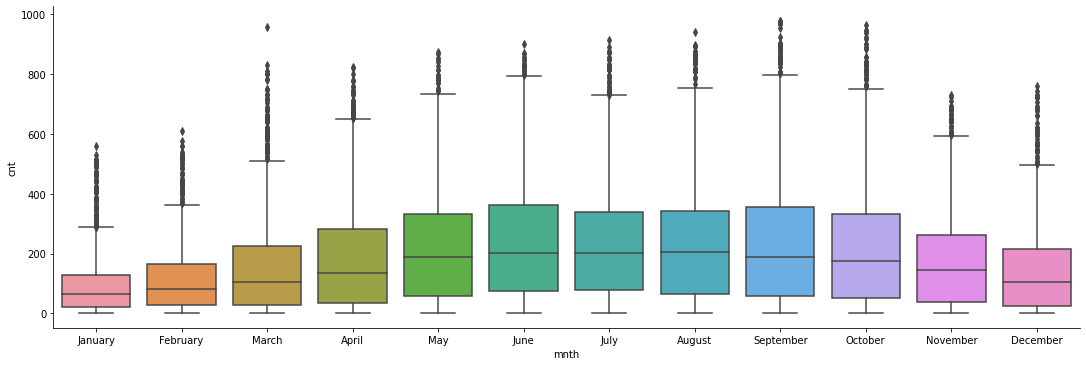

In [ ]:
data_graphic['mnth'] = data_graphic.mnth.map({1:'January', 2:'February', 3:'March', 4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}) # add the names of the months
plt.figure(figsize=(12,6))
sns.catplot(x = 'mnth', y = 'cnt', data = data_graphic, kind = 'box', aspect = 3) #Plot the demand according to the month

Il est évident que les gens ont tendance à ne pas louer des vélos pendant  saison d'hiver, car il n'est pas vraiment propice de faire du vélo à cette saison, c'est pourquoi les mois de janvier, février ont une demande relativement plus basse de vélos.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


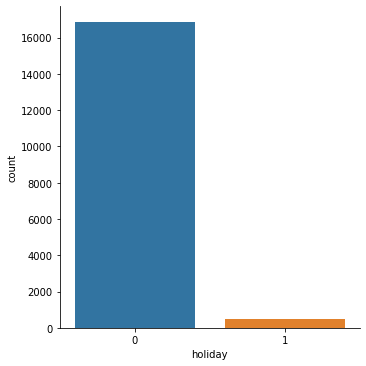

In [ ]:
#holiday
sns.factorplot(x='holiday',data=data_graphic,kind='count',size=5,aspect=1)
plt.show()

La plupart des points aberrants proviennent principalement des jours qui ne sont pas du vacances.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


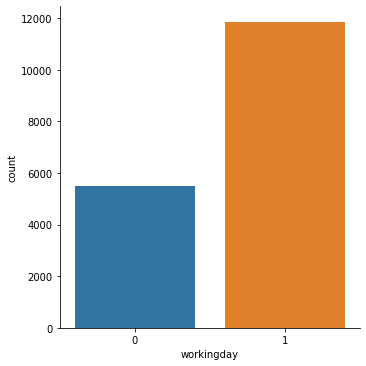

In [ ]:
#working days
sns.factorplot(x='workingday',data=data_graphic,kind='count',size=5,aspect=1)
plt.show()

La plupart des points aberrants proviennent principalement des jours de travail.



#build models


In [ ]:
#defining our input and output
X = data_train.drop('cnt',axis=1)
y = data_train['cnt']

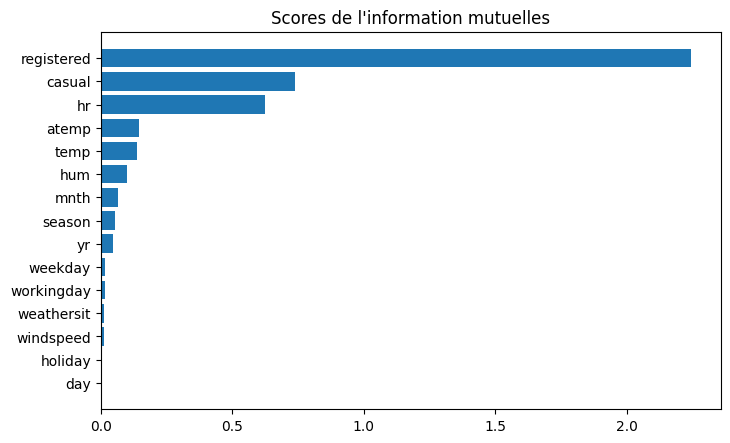

In [ ]:
#display the scores of the mutual information to get rid of columns that will have no impact on the prediction
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Scores de l'information mutuelles")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

"casual" et "registred" ne sont pas non plus pris en compte car il s'agit de variables de fuite par nature et elles doivent être abandonnées lors de la construction du modèle.

In [ ]:
X.drop(['casual','registered'], axis = 1, inplace = True)# get rid of columns that are not necessary for our prediction

       season  yr  day  mnth  hr  ...  weathersit  temp   atemp   hum  windspeed
0           1   0    1     1   0  ...           1  0.24  0.2879  0.81     0.0000
1           1   0    1     1   1  ...           1  0.22  0.2727  0.80     0.0000
2           1   0    1     1   2  ...           1  0.22  0.2727  0.80     0.0000
3           1   0    1     1   3  ...           1  0.24  0.2879  0.75     0.0000
4           1   0    1     1   4  ...           1  0.24  0.2879  0.75     0.0000
...       ...  ..  ...   ...  ..  ...         ...   ...     ...   ...        ...
17374       1   1   31    12  19  ...           2  0.26  0.2576  0.60     0.1642
17375       1   1   31    12  20  ...           2  0.26  0.2576  0.60     0.1642
17376       1   1   31    12  21  ...           1  0.26  0.2576  0.60     0.1642
17377       1   1   31    12  22  ...           1  0.26  0.2727  0.56     0.1343
17378       1   1   31    12  23  ...           1  0.26  0.2727  0.65     0.1343

[17379 rows x 13 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)#separate our data on training and testing data

In [ ]:
#linear regression 
from sklearn.linear_model import LinearRegression
# model fitting
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
#make predection
y_pred_ln = lr_reg.predict(X_test)
# checking the rmsle and the r2_score
print('r2_score:',r2_score(y_test,y_pred_ln))
print('rmsle:',mean_squared_log_error(y_test,y_pred_ln))


r2_score: 0.4028680681854181


ValueError: ignored

In [ ]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
#fitting model AAdaBoostRegressor
abr = AdaBoostRegressor(random_state=42)
abr.fit( X_train , y_train )
y_pred= abr.predict(X_test)
# checking the rmsle and the r2_score
print('rmsle:',mean_squared_log_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

rmsle: 1.2642716865008605
r2_score: 0.6565150765038703


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# model fitting
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit( X_train , y_train )
# Prediction
y_pred = model_rf.predict(X_test)
# checking the rmsle and the r2_score
print('rmsle:',mean_squared_log_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

rmsle: 0.11988938507341049
r2_score: 0.9435845929543392


In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators = 1000)
xgb_reg.fit(X_train, y_train)
y_pred_xg = xgb_reg.predict(X_test)

# checking the rmsle and the r2_score
print('rmsle:',mean_squared_log_error(y_test,y_pred_xg))
print('r2_score:',r2_score(y_test,y_pred_xg))

[00:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: ignored

In [ ]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor()
#fitting our model
model_knn.fit( X_train , y_train )
#prediction
y_pred_knn = model_knn.predict(X_test)
# checking the rmsle and the r2_score
print('rmsle:',mean_squared_log_error(y_test,y_pred_knn))
print('r2_score:',r2_score(y_test,y_pred_knn))

rmsle: 0.3017620205640171
r2_score: 0.8327520815195663


Notez que les modèles : régression linéaire, Xgboost ne sont pas bons pour notre prédiction. Le problème est que ces modèles prédisent des valeurs négatives pour la cible, ce qui n'est pas possible.

pour les trois modèls qu'ils reste (KNeighborsRegressor,AdaBoostRegressor,RandomForestRegressor) on remarque que le RandomForestRegressor donne le plus petit rmsle et le meilleur r2_score .pour cela  je l'utiliserai pour faire des prédictions. mais cette fois avec une optimisation des parametrs 


In [ ]:
# parametrs optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42,shuffle=True)

params_dict = {'n_estimators':[100, 200, 300, 1000],'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
rf_reg = GridSearchCV(estimator= model_rf,param_grid = params_dict,scoring = 'neg_mean_squared_log_error',cv = kfold)
rf_reg.fit(X_train,y_train)
# checking the best parameter
rf_reg.best_params_

{'max_features': 'auto', 'n_estimators': 1000, 'n_jobs': -1}

In [ ]:
#RandomForestRegressor with obtimized parametrs
from sklearn.ensemble import RandomForestRegressor
# model fitting
model_rf = RandomForestRegressor(max_features = 'auto', n_estimators= 400, n_jobs= -1,random_state=42)
model_rf.fit( X_train , y_train )
# Prediction
y_pred = model_rf.predict(X_test)
# checking the rmsle and the r2_score
print('rmsle:',mean_squared_log_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))


rmsle: 0.11932862595459241
r2_score: 0.9440726877846449


l'obtimisation des parametres n'a pas impacté le score méme si elle a pris assez du temps pour excuter le programme